In [ ]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

from functions_AIA import *

import torch

#for visualisation
import ipympl

Tutorial to download AIA images can be found there: https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/downloading_cutouts.html


## Code 

In [ ]:
#Running the code over the dataset
data=load_data()
data["image"]=0
num_image=15 # choose the number of image per event (cadency is one image per 24 sec)
for i in range(15): #choose the number of events in the dataframe we want to extract
    files=get_image(data[data.index==i],num_image) #first line of the data
    image_array=array_file(files)

    data["image"][i]=[image_array]


#Exemple of plot an array from the dataframe
array=data["image"][14]
array_14=array[0]
plot_array(array_14)

In [ ]:
data.to_csv("15_first_events.csv", index=False)

In [42]:
array=data["image"][14]

In [43]:
array_14=array[0]
array_14.shape

(500, 500, 15)

C:\Users\Adrien\AppData\Local\Temp\ipykernel_5984\1920377369.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


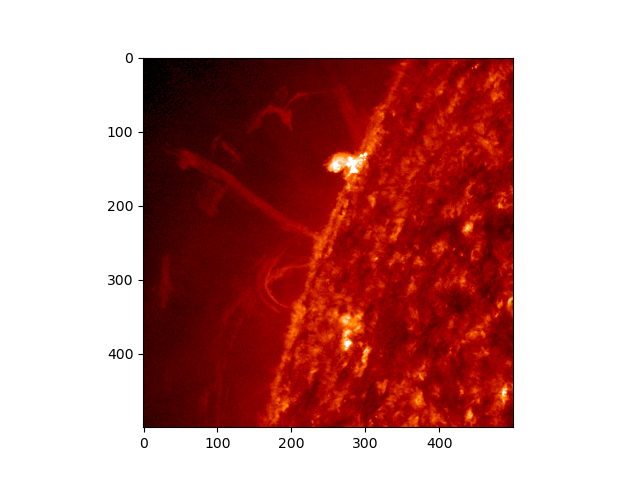

In [52]:
plt.figure()
vmin, vmax=np.percentile(array_14, [1, 99.9])
norm=ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())
plt.imshow(array_14[:,:,0], norm=norm, cmap="sdoaia304")

plt.show()